In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential,Model
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Activation,Dropout,Input,Lambda,Cropping2D
import PIL
from PIL import Image
from keras.backend import tf as ktf

cd C:\Users\Hussain Ravat\Udacity SCDNP\Project 4\CarND-Behavioral-Cloning-P3<br>
python drive.py drive_model.h5<br>
https://engmrk.com/alexnet-implementation-using-keras/

(160, 320, 3)


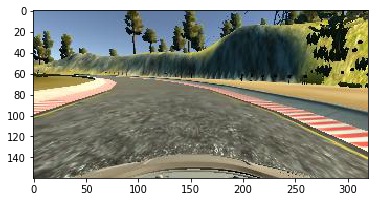

In [2]:
#Check random image
img = plt.imread('./IMG/center_2019_02_24_01_24_49_404.jpg')
plt.imshow(img)
print(np.shape(img))

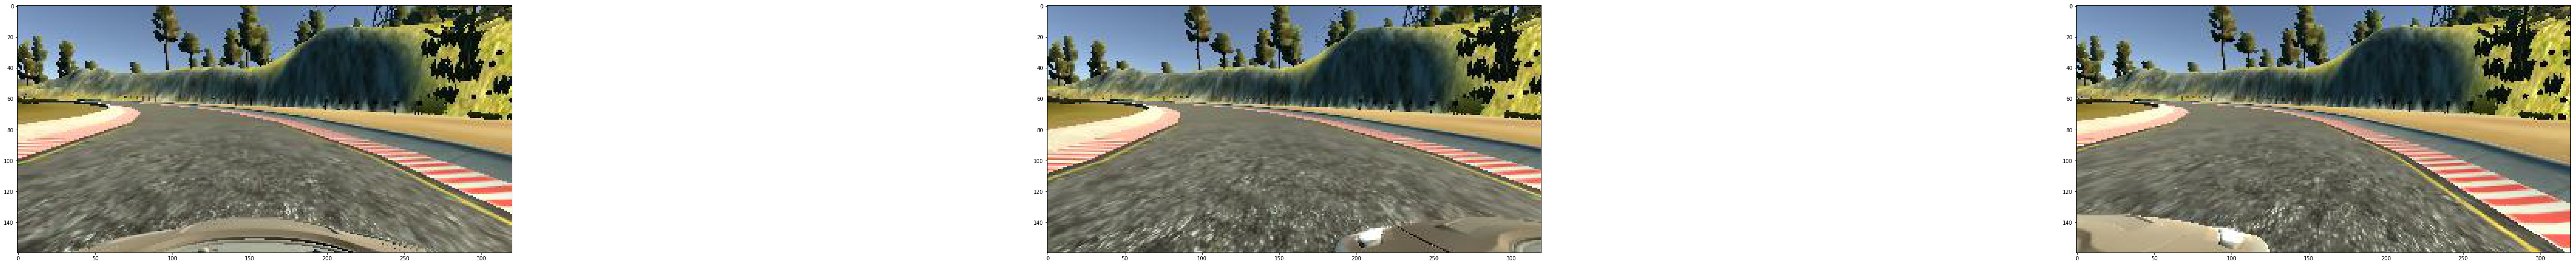

In [3]:
###Plotting th same image for reft light and centre
plt.figure(figsize=(100,40))
columns = 3
row =1
cnt=0
for i in ['center','left','right']:
    image = plt.imread('./IMG/'+i+'_2019_02_24_01_24_49_404.jpg')
    plt.subplot(columns + 1, columns, cnt + 1)
    #img = plt.imread(image)
    plt.imshow(image)
    cnt=cnt+1

In [4]:
#Read in the drive log
df_drive_log = pd.read_csv('./driving_log.csv')

In [18]:
####appending the images for training
all_center_images = []
steering_angles = []
for index, row in df_drive_log.iterrows():
    ### READING CENTER IMAGES
    img = plt.imread(row['Centre'])
    all_center_images.append(img)
    all_center_images.append(np.fliplr(img))
    steering_angles.append(row['Steering'])
    steering_angles.append(-row['Steering'])

    correction = 0.2
    ### READING LEFT IMAGES
    img = plt.imread(row['Left'].lstrip())
    all_center_images.append(img)
    all_center_images.append(np.fliplr(img))
    steering_angles.append(row['Steering']+correction)
    steering_angles.append(-(row['Steering']+correction))
 
    ### READING LEFT IMAGES
    img = plt.imread(row['Right'].lstrip())
    all_center_images.append(img)
    all_center_images.append(np.fliplr(img))
    steering_angles.append(row['Steering']-correction)
    steering_angles.append(-(row['Steering']-correction))
    
all_center_images = np.asarray(all_center_images)    
steering_angles = np.asarray(steering_angles)

In [19]:
#####Prepare the train data
X_train = all_center_images
y_train = steering_angles

In [20]:
#Instantiate an empty model
model = Sequential()

##Preprocessing Layer
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(110,320,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
#model.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), padding='valid'))
#model.add(Activation('relu'))

# 5th Convolutional Layer
#model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding='valid'))
#model.add(Activation('relu'))
# Max Pooling
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
#model.add(Dense(4096))
#model.add(Activation('relu'))
# Add Dropout
#model.add(Dropout(0.4))

# 3rd Fully Connected Layer
#model.add(Dense(1000))
model.add(Dense(64))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1))
#model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_4 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 78, 96)        34944     
_________________________________________________________________
activation_12 (Activation)   (None, 20, 78, 96)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 39, 96)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 35, 256)        614656    
_________________________________________________________________
activation_13 (Activation)   (None, 6, 35, 256)        0         
__________

In [21]:
# Compile the model
model.compile(loss='mse', optimizer='adam')

In [22]:
model.fit(X_train,y_train,epochs=5,shuffle=True,validation_split=0.1)
model.save('./drive_model.h5')

Train on 3807 samples, validate on 423 samples
Epoch 1/5
3807/3807 [==============================] - 124s 33ms/step - loss: 0.2317 - val_loss: 0.0432
Epoch 2/5
3807/3807 [==============================] - 121s 32ms/step - loss: 0.0312 - val_loss: 0.0474
Epoch 3/5
3807/3807 [==============================] - 122s 32ms/step - loss: 0.0266 - val_loss: 0.0638
Epoch 4/5
3807/3807 [==============================] - 152s 40ms/step - loss: 0.0240 - val_loss: 0.0663
Epoch 5/5
3807/3807 [==============================] - 163s 43ms/step - loss: 0.0215 - val_loss: 0.0552
